## $\textit{Computational Astrophysics Tutorial IV}$
## $\textit{Xola Ndaliso (NDLXOL020)}$

### $\textit{Closed-box model}$

In [23]:
import numpy as np
import pylab as pl
import astropy.units as u
%matplotlib inline
import matplotlib as 

Mg_0 = 5.0e+9
Mst_0 = 0.
Zg_0 = 0
Mzg_0 = Zg_0*Mg_0   #from Zg = Mzg/Mg
Zst_0 = 0           #initially stars have zero metals
Mzst_0 = Zst_0*(-Mg_0)  #from Zst = Mzst/Mst


def C_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0):
    
    psi, R, h, yz = 1.0, .43, 20e+6, .03   #h is dt
    t, Zs = [], []
    Mgas, Mzg, Zg, Mzst = [], [], [], [[] for _ in range(2)] 
    Mst = [[] for _ in range(2)] 

    for i in np.arange(0., 10e9 + 20e+6, 20e+6):
        if Mg_0 >= 0.:

            t.append(i/1e+9)
            Mg_0 += -(1 - R)*psi*h             #gas mass calculation using Euler
            Mgas.append(Mg_0)

            M_st = (1 - R)*psi*h                 #stellar mass at each time step
            Mst[1].append(M_st)

            Mst_0 += M_st                        #total stellar mass after each time step
            Mst[0].append(Mst_0)

            Mzg_0 += (-Zg_0*psi + yz*psi)*h      #mass of gas-phase metals
            Mzg.append(Mzg_0)

            Mzst_sp = (1 - R)*Zg_0*psi*h
            Mzst[1].append(Mzst_sp)        

            Mzst_0 += Mzst_sp          #stellar metallicity
            Mzst[0].append(Mzst_0)

            Zg_0 = Mzg_0/Mg_0                      #gas metallicity parameter
            Zg.append(Zg_0)

        else:
            break

    return Mgas, Mst, Zg, Mzg, Mzst, t


### $\textit{Leaky-box model}$

In [24]:
def L_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0):

    psi, R, h, yz, alpha = 1., .43, 20e+6, .03, .8
    t = []   
    Mgas, Mzg, Zg, Mzst = [], [], [], [[] for _ in range(2)]
    Mst = [[] for _ in range(2)]

    for i  in np.arange(0., 10e9 + 20e+6, 20e+6):
        if Mg_0 >= 0.:

            t.append(i/1e+9)

            Mg_0 += (-1 + R)*psi*h         #step 1: gas mass from SNe

            Mzg_0 += (-Zg_0*psi + yz*psi)*h   #step1: gas phase metals
            Mzg.append(Mzg_0)

            Mst_sp = (1 - R)*psi*h
            Mst[1].append(Mst_sp)

            Mst_0 += Mst_sp
            Mst[0].append(Mst_0)

            Mzst_sp = (1 - R)*Zg_0*psi*h 
            Mzst[1].append(Mzst_sp)

            Mzst_0 += Mzst_sp    #step1: mass of stellar metals
            Mzst[0].append(Mzst_0)

            Zg_0 = Mzg_0/Mg_0                            #step 2: gas metallicity
            Zg.append(Zg_0)

            
            Mg_0 += (-alpha*psi)*h             #step 3: amount of mass removed from the box
            Mgas.append(Mg_0)

            Mzg_0 += (-alpha*Zg_0*psi)*h       #step 3: amount of gas-phase metal mass removed
            Mzg.append(Mzg_0)
        else:
            break


    return Mgas, Mst, Zg, Mzg, Mzst, t

### $\textit{Accretting-box model}$

In [25]:
def A_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0):

    psi, R, h, yz, alpha, Z_i = 1., .43, 20e+6, .03, .8, 0.0
    beta = (1 - R)*psi
    t = []   
    Mgas, Mzg, Zg, Mzst = [], [], [], [[] for _ in range(2)]
    Mst = [[] for _ in range(2)]

    for i in np.arange(0., 10e9 + 20e+6, 20e+6):

        if Mg_0 >= 0.:

            t.append(i/1e+9)
            Mg_0 += (-psi + R*psi + beta)*h
            Mgas.append(Mg_0)

            Mzg_0 += (-Zg_0*psi + yz*psi + Z_i*beta)*h
            Mzg.append(Mzg_0)

            Mst_sp = (psi - R*psi)*h
            Mst[1].append(Mst_sp)

            Mst_0 += Mst_sp
            Mst[0].append(Mst_0)

            Mzst_sp = (1 - R)*Zg_0*psi*h
            Mzst[1].append(Mzst_sp)

            Mzst_0 += Mzst_sp
            Mzst[0].append(Mzst_0)

            Zg_0 = Mzg_0/Mg_0
            Zg.append(Zg_0)
        else:
            break

    return Mgas, Mst, Zg, Mzg, Mzst, t


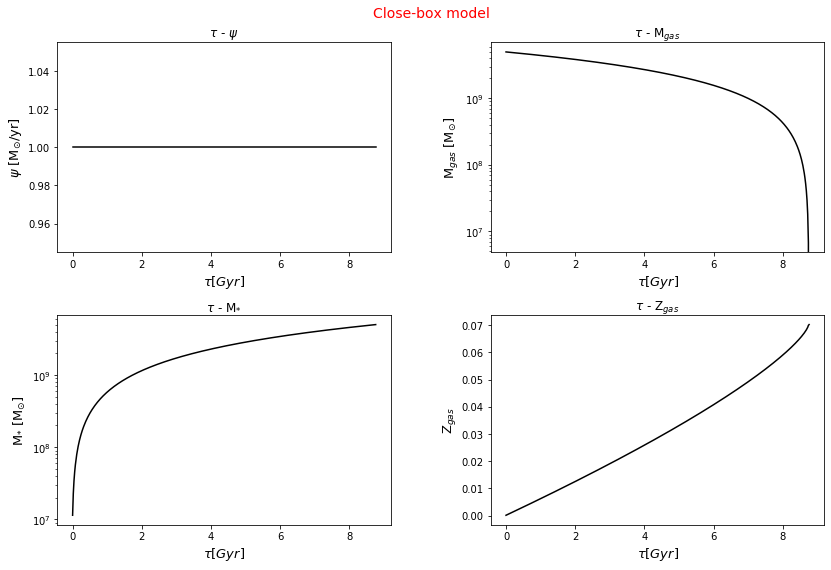

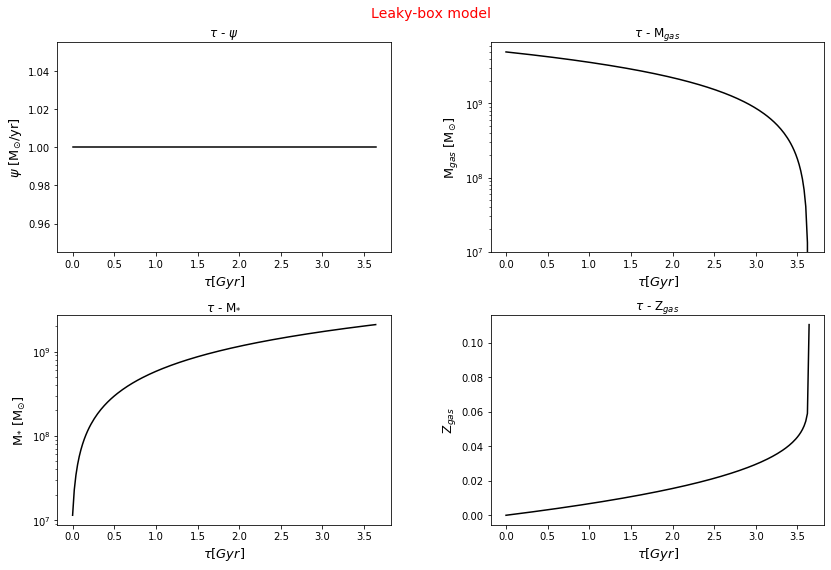

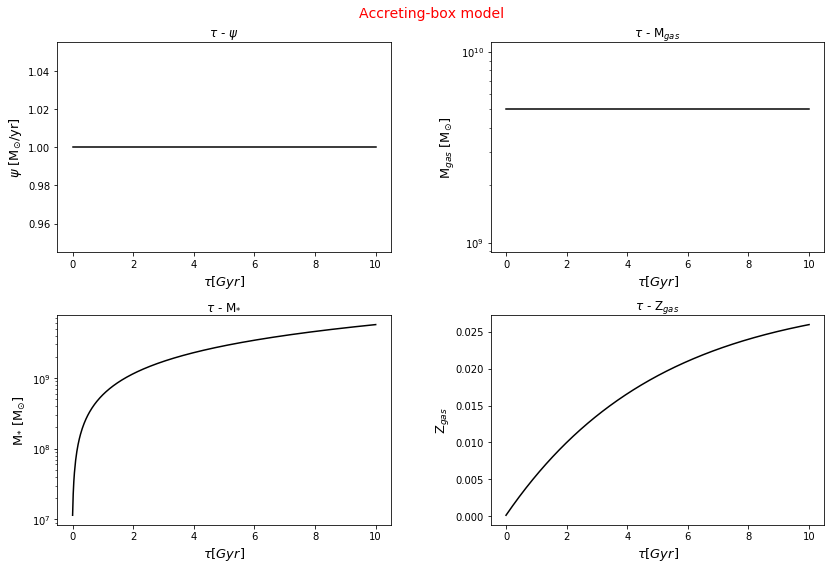

In [26]:
#Closed-box model
Mgas_cbm = C_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[0]        #reading gas mass
Ms_cbm = C_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[1]          #reading stellar mass i.e both total and each SP
Zg_cbm = C_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[2]          #reading gas metallicity
Mzs_cbm = C_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[4]          #Mzs
t_cbm = C_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[5]
sfr_cbm = np.ones(len(t_cbm))
Zs_cbm = Zg_cbm                                          #reading stellar metallicity as: Zs = Mzs/Ms

#Leaky-box model
Mgas_lbm = L_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[0]
Ms_lbm = L_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[1]
Zg_lbm = L_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[2]
Mzs_lbm = L_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[0][4]
t_lbm = L_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[5]
sfr_lbm = np.ones(len(t_lbm))
Zs_lbm = Zg_lbm

#Accreting-box model
Mgas_abm = A_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[0]
Ms_abm = A_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[1]
Zg_abm = A_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[2]
Mzs_abm = A_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[4]
t_abm = A_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[5]
sfr_abm = np.ones(len(t_abm))
Zs_abm = Zg_abm


#dictionary containing all the the information to plot
d_dat = {'t':[t_cbm, t_lbm, t_abm], 'sfr':[sfr_cbm, sfr_lbm, sfr_abm], 'Mgas':[Mgas_cbm, Mgas_lbm, Mgas_abm],
         'Mst':[Ms_cbm, Ms_lbm, Ms_abm], 'Zg': [Zg_cbm, Zg_lbm, Zg_abm],
         'gce': ['Close-box model', 'Leaky-box model', 'Accreting-box model']}

for i in range(3):
    
    pl.subplot(221, title = '$\\tau$ - $\psi$')   #star formation rate plot
    pl.plot(d_dat['t'][i], d_dat['sfr'][i], c = 'k')
    pl.xlabel('$\\tau [Gyr]$', fontsize = 13)
    pl.ylabel('$\psi$ [M$_{\odot}$/yr]', fontsize = 13)

    pl.subplot(222, title = '$\\tau$ - M$_{gas}$')   #gas mass plot 
    pl.plot(d_dat['t'][i], d_dat['Mgas'][i], c = 'k')
    pl.yscale('log')
    pl.xlabel('$\\tau [Gyr]$', fontsize = 13)
    pl.ylabel('M$_{gas}$ [M$_{\odot}$]', fontsize = 13)

    pl.subplot(223, title = '$\\tau$ - M$_{*}$')   #stellar mass plot
    pl.plot(d_dat['t'][i], d_dat['Mst'][i][0], c = 'k')
    pl.yscale('log')
    pl.xlabel('$\\tau [Gyr]$', fontsize = 13)
    pl.ylabel('M$_{*}$ [M$_{\odot}$]', fontsize = 13)

    pl.subplot(224, title = '$\\tau$ - Z$_{gas}$')   #gas metallicity plot
    pl.plot(d_dat['t'][i], d_dat['Zg'][i] , c = 'k')
    pl.xlabel('$\\tau [Gyr]$', fontsize = 13)
    pl.ylabel('Z$_{gas}$', fontsize = 13)
    
    
    pl.suptitle(d_dat['gce'][i], x = 0.99, y = 1.9, ha = 'center', va = 'center', color = 'r', fontsize = 14)
    pl.subplots_adjust(right = 1.9, top = 1.8, hspace = 0.3, wspace = .3)
    pl.show()

 For each GCE model the star formation remains the same as we have expected. One noticeable difference on the three models is the evolution of gas mass over the cosmic time. For the closed-box model the gas mass gets totally converted into stars at ~ 8.7 Gyr. On the contrary, for the leaky box model this happens early (i.e ~ 3.8 Gyr), this is due to the gas that escapes the 'box', thus for this model not all the gas is converted into stars, but some of it escapes the from the 'box'. Furthermore, for the accreting-box model the gas mass remains constant over the evolution of the simulation. In reality we would expect an increase for this scenario, but that is not the case. This is due to the way it is modelled for this current simulation. The amount of gas that gets added is very tiny such that it makes no change on the total mass of the gass. The evolution of stellar mass is behaving as expected for each model i.e increases. The increase in each of the models is proportional to the decreas of the gas mass, which is what we expected.

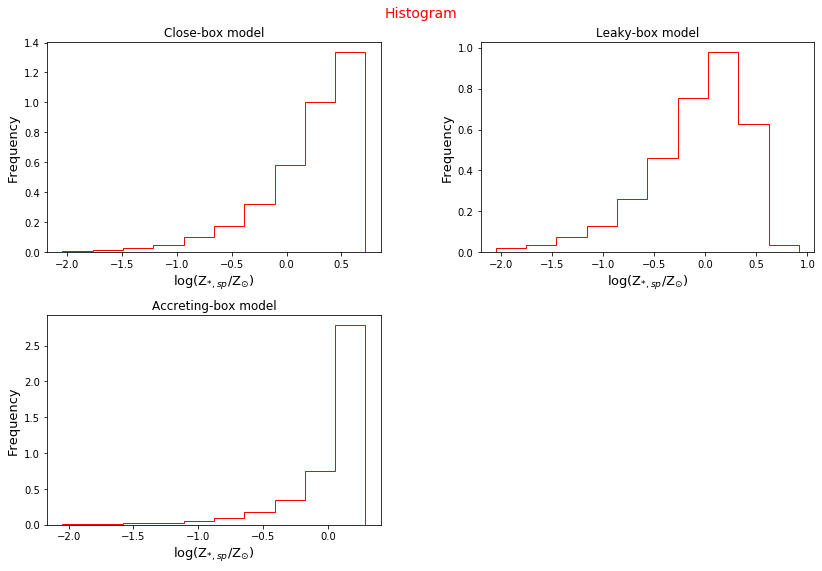

In [17]:
#same dictionary just added the stellar metallicities: 'Zs'
#for plotting the histograms

d_dat = {'Mgas':[Mgas_cbm, Mgas_lbm, Mgas_abm], 'Mst':[Ms_cbm, Ms_lbm, Ms_abm], 'Zg': [Zg_cbm, Zg_lbm, Zg_abm],
        'Zs':[Zs_cbm, Zs_lbm, Zs_abm],'gce': ['Close-box model', 'Leaky-box model', 'Accreting-box model']}

Z_sol = 0.0134

for i in range(3):
    
    pl.subplot(220 + i + 1, title = d_dat['gce'][i])
    dist = np.log10(np.array(d_dat['Zs'][i])/Z_sol)
    dist[np.isnan(dist)], dist[np.isinf(dist)] = 0, 0
    pl.hist(dist, density = True, edgecolor = 'r', fill = False, histtype = 'stepfilled')
    pl.xlabel('log(Z$_{*,sp}$/Z$_{\odot}$)', fontsize = 13)
    pl.ylabel('Frequency', fontsize = 13)

pl.subplots_adjust(right = 1.9, top = 1.8, hspace = 0.3, wspace = .3)
pl.suptitle('Histogram', x = 0.99, y = 1.9, ha = 'center', va = 'center', color = 'r', fontsize = 14)
pl.show()

/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


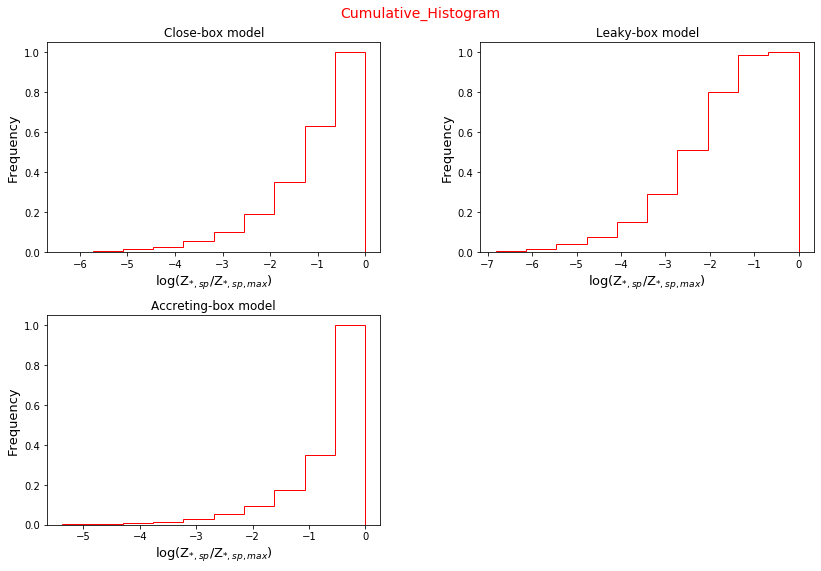

In [18]:
#plotting the cumulative histogram for each model
for i in range(3):
    
    pl.subplot(220 + i + 1, title = d_dat['gce'][i])
    cumlt = np.log(d_dat['Zs'][i]/np.max(d_dat['Zs'][i]))
    cumlt[np.isnan(cumlt)] = 0
    cumlt[np.isinf(cumlt)] = 0
    pl.hist(cumlt, normed = True, edgecolor = 'r', fill = False, histtype = 'stepfilled', cumulative = True)
    pl.xlabel('log(Z$_{*,sp}$/Z$_{*,sp,max}$)', fontsize = 13) 
    pl.ylabel('Frequency', fontsize = 13)

pl.subplots_adjust(right = 1.9, top = 1.8, hspace = 0.3, wspace = .3)
pl.suptitle('Cumulative_Histogram', x = 0.99, y = 1.9, ha = 'center', va = 'center', color = 'r', fontsize = 14)
pl.show()

These distributions are different for each model because ecah model has a different evolution of the gas mass. This affects the evolution of the metallicity of the gas phase metals which indirectly affects the metallicity of the stars.

### $\textit{Breathing-box model}$

In [19]:
#I assume ouflows -> infall in this model
#applying Galactic Fountain formalism

def B_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0):
    
    psi, R, h, yz, alpha, Z_i = 1.0, .43, 20e+6, .03, .8, 0.0
    t = []
    beta = (1 - R)*psi  
    Mgas, Mzg, Zg, Mzst = [], [], [], [[] for _ in range(2)]
    Mst = [[] for _ in range(2)]
    
    for i  in np.arange(0., 10e+9 + 20e+6, 20e+6):
        
        if Mg_0 >= 0.:              #running the simulation while there is gas mass
            
            t.append(i/1e+9)
        
            Mg_0 += (-1 + R)*psi*h         #step 1: gas mass from SNe

            Mzg_0 += (-Zg_0*psi + yz*psi)*h   #step1: gas phase metals

            Mst_sp = (1 - R)*psi*h
            Mst[1].append(Mst_sp)
            
            Mst_0 += Mst_sp
            Mst[0].append(Mst_0)
            
            Mzst_sp = (1 - R)*Zg_0*psi*h
            Mzst[1].append(Mzst_sp)
            
            Mzst_0 +=  Mzst_sp               #step1: mass of stellar metals
            Mzst[0].append(Mzst_0)

            Mg_0 += (-alpha*psi)*h             #step 3: amount of gass mass removed from the box(outflow)

            Mzg_0 += (-alpha*Zg_0*psi)*h       #step 3: amount of gas-phase metal mass removed

            Mg_0 += beta*h                       #amount of gas mass infalling
            Mgas.append(Mg_0)
            
            Mzg_0 += (-Zg_0*psi + yz*psi + Z_i*beta)*h     #amount of mass gas phase metals infalling
            Mzg.append(Mzg_0)

            Zg_0 = Mzg_0/Mg_0
            Zg.append(Zg_0)
        
        else:
            break
            
    return Mgas, Mst, Zg, Mzg, Mzst, t

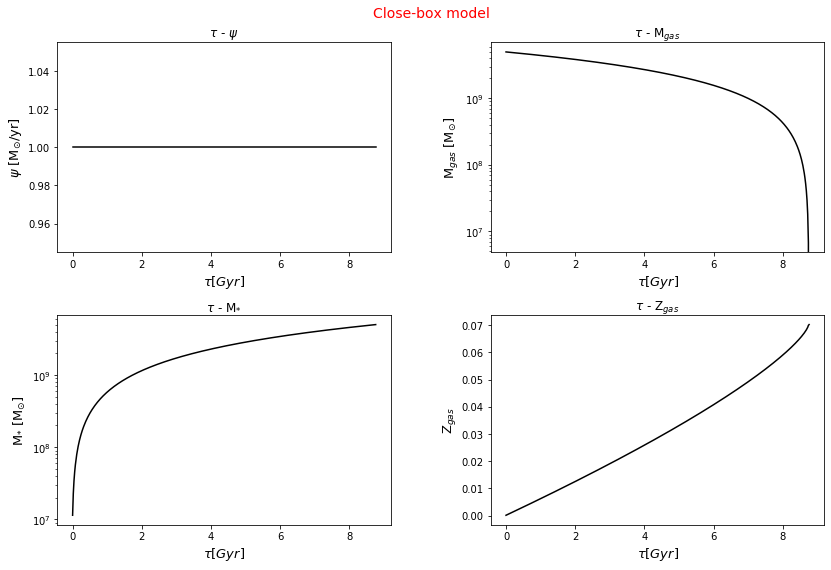

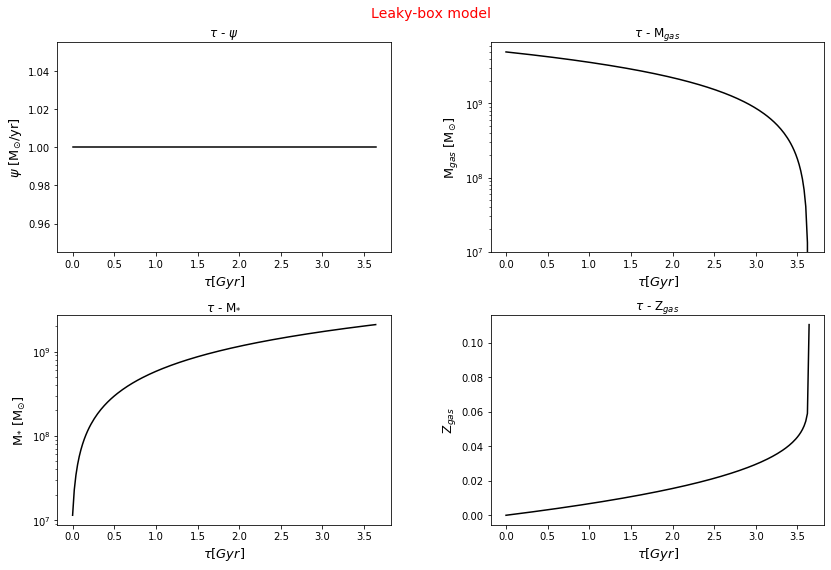

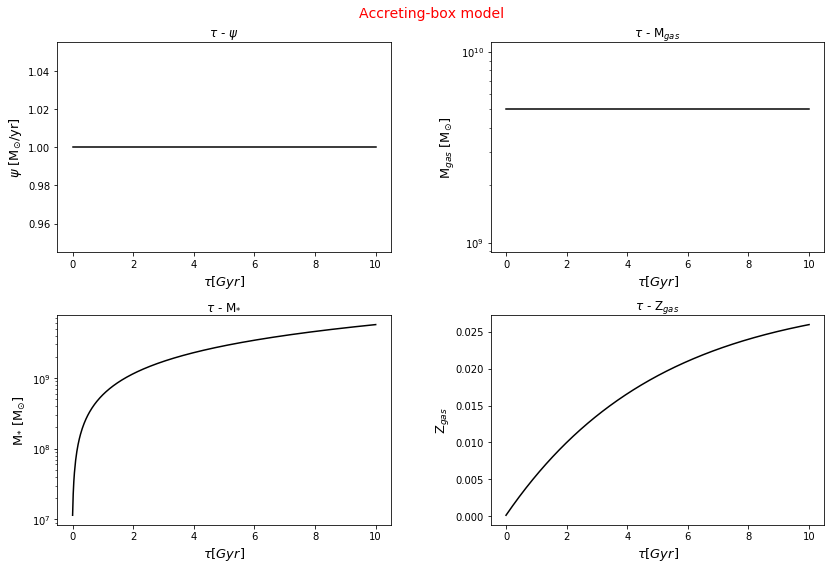

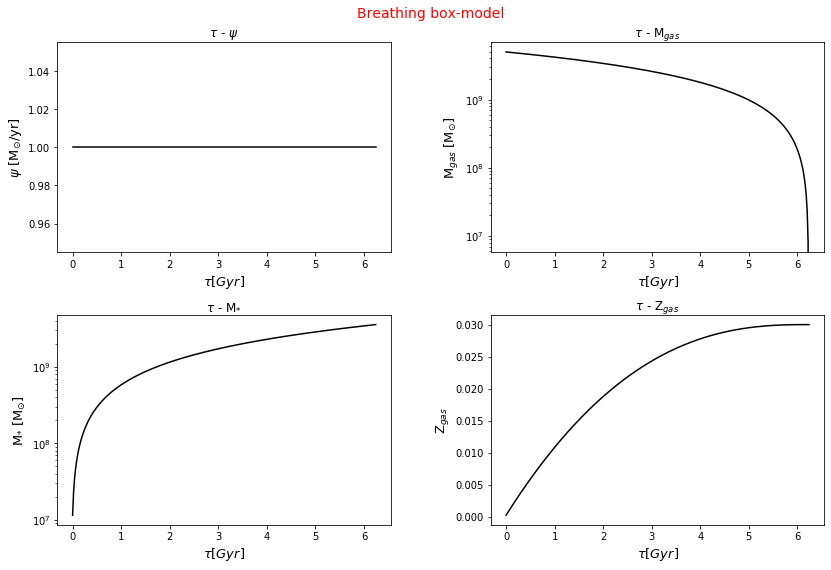

In [20]:
#Breathing-box model
Mgas_bbm = B_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[0]
Ms_bbm = B_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[1]
Zg_bbm = B_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[2]
Mzs_bbm = B_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[4]
t_bbm = B_box_model(Mg_0, Mzg_0, Zg_0, Mzst_0, Mst_0)[5]
sfr_bbm = np.ones(len(t_bbm))
Zs_bbm = Zg_bbm


#dictionary with all this data
d_dat = {'t':[t_cbm, t_lbm, t_abm, t_bbm], 'sfr':[sfr_cbm, sfr_lbm, sfr_abm, sfr_bbm], 
         'Mgas':[Mgas_cbm, Mgas_lbm, Mgas_abm, Mgas_bbm],'Mst':[Ms_cbm, Ms_lbm, Ms_abm, Ms_bbm],
         'Zg': [Zg_cbm, Zg_lbm, Zg_abm, Zg_bbm],'gce': ['Close-box model', 'Leaky-box model', 
                                                        'Accreting-box model', 'Breathing box-model']}

for i in range(4):
    
    
    pl.subplot(221, title = '$\\tau$ - $\psi$')   #star formation rate plot
    pl.plot(d_dat['t'][i], d_dat['sfr'][i], c = 'k')
    pl.xlabel('$\\tau [Gyr]$', fontsize = 13)
    pl.ylabel('$\psi$ [M$_{\odot}$/yr]', fontsize = 13)

    pl.subplot(222, title = '$\\tau$ - M$_{gas}$')   #gas mass plot 
    pl.plot(d_dat['t'][i], d_dat['Mgas'][i], c = 'k')
    pl.yscale('log')
    pl.xlabel('$\\tau [Gyr]$', fontsize = 13)
    pl.ylabel('M$_{gas}$ [M$_{\odot}$]', fontsize = 13)

    pl.subplot(223, title = '$\\tau$ - M$_{*}$')   #stellar mass plot
    pl.plot(d_dat['t'][i], d_dat['Mst'][i][0], c = 'k')
    pl.yscale('log')
    pl.xlabel('$\\tau [Gyr]$', fontsize = 13)
    pl.ylabel('M$_{*}$ [M$_{\odot}$]', fontsize = 13)

    pl.subplot(224, title = '$\\tau$ - Z$_{gas}$')   #gas metallicity plot
    pl.plot(d_dat['t'][i], d_dat['Zg'][i] , c = 'k')
    pl.xlabel('$\\tau [Gyr]$', fontsize = 13)
    pl.ylabel('Z$_{gas}$', fontsize = 13)
    
    
    pl.suptitle(d_dat['gce'][i], x = 0.99, y = 1.9, ha = 'center', va = 'center', color = 'r', fontsize = 14)
    pl.subplots_adjust(right = 1.9, top = 1.8, hspace = 0.3, wspace = .3)
    pl.show()

For the breathing box model a Galactic Fountain like model was assumed, thus the outflow of gas is assumed before its infall. The evolution of the gas mass of this model looks more like that of accreting box model, this is due to the fact that the amount of infall is very less compared to outflow, that the gas mass quiclky get finished due to both star formation and outflow. There metallicity of the gas pahse metals for this model shoots up, this might be due to the fact that the gas flows out and rain back into the galaxy disc again. 

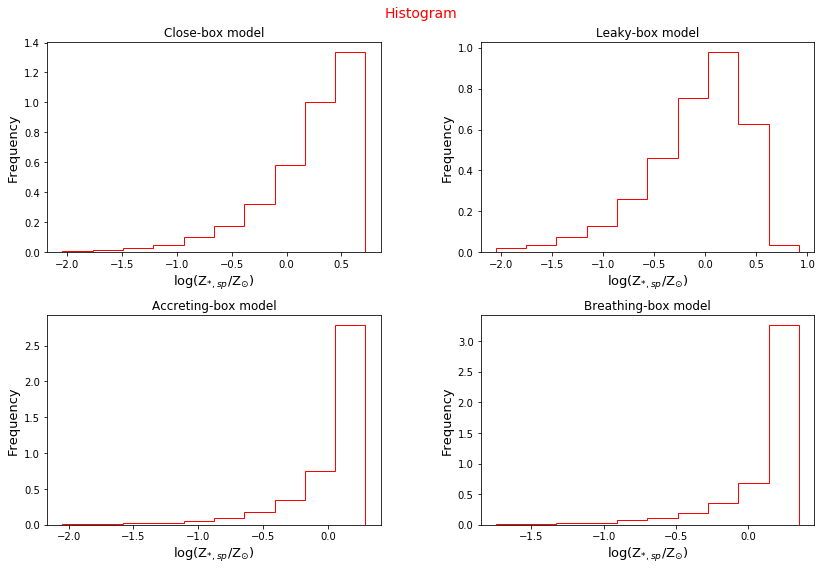

In [21]:
#same dictionary just added the stellar metallicities: 'Zs'

d_dat = {'Mgas':[Mgas_cbm, Mgas_lbm, Mgas_abm, Mgas_bbm], 'Mst':[Ms_cbm, Ms_lbm, Ms_abm, Mgas_bbm], 
         'Zg': [Zg_cbm, Zg_lbm, Zg_abm, Zg_bbm],'Zs':[Zs_cbm, Zs_lbm, Zs_abm, Zs_bbm],
         'gce': ['Close-box model', 'Leaky-box model', 'Accreting-box model', 'Breathing-box model']}

Z_sol = 0.0134            #solar metallicity

for i in range(4):
    pl.subplot(220 + i + 1, title = d_dat['gce'][i])
    dist = np.log10(np.array(d_dat['Zs'][i])/Z_sol)
    dist[np.isnan(dist)], dist[np.isinf(dist)] = 0, 0
    pl.hist(dist, density = True, edgecolor = 'r', fill = False, histtype = 'stepfilled')
    pl.xlabel('log(Z$_{*,sp}$/Z$_{\odot}$)', fontsize = 13)
    pl.ylabel('Frequency', fontsize = 13)

pl.subplots_adjust(right = 1.9, top = 1.8, hspace = 0.3, wspace = .3)
pl.suptitle('Histogram', x = 0.99, y = 1.9, ha = 'center', va = 'center', color = 'r', fontsize = 14)
pl.show()

/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
/home/xoks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


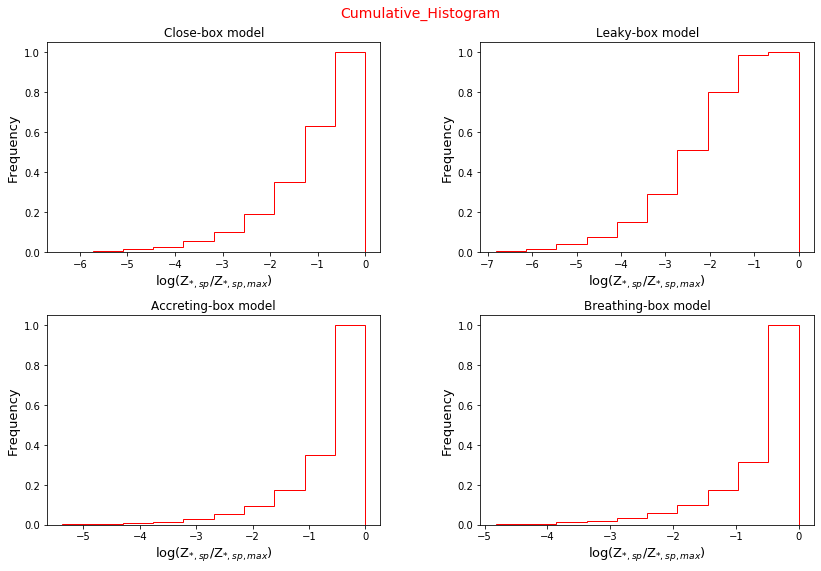

In [22]:
for i in range(4):
    
    pl.subplot(220 + i + 1, title = d_dat['gce'][i])
    cumlt = np.log(d_dat['Zs'][i]/np.max(d_dat['Zs'][i]))
    cumlt[np.isnan(cumlt)] = 0
    cumlt[np.isinf(cumlt)] = 0
    pl.hist(cumlt, normed = True, edgecolor = 'r', fill = False, histtype = 'stepfilled', cumulative = True)
    pl.xlabel('log(Z$_{*,sp}$/Z$_{*,sp,max}$)', fontsize = 13)
    pl.ylabel('Frequency', fontsize = 13)

pl.subplots_adjust(right = 1.9, top = 1.8, hspace = 0.3, wspace = .3)
pl.suptitle('Cumulative_Histogram', x = 0.99, y = 1.9, ha = 'center', va = 'center', color = 'r', fontsize = 14)
pl.show()